# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

Survived  Pclass  ... Parents/Children Aboard     Fare
0      Dead       3  ...                       0   7.2500
1  Survived       1  ...                       0  71.2833
2  Survived       3  ...                       0   7.9250
3  Survived       1  ...                       0  53.1000
4      Dead       3  ...                       0   8.0500

[5 rows x 8 columns]

# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [ ]:
# What are the "type" of each column? 

df_titanic.dtypes

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [ ]:
df_titanic.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [ ]:
# Dead = 0, survived = 1
df_titanic['Survived_fact'] = df_titanic['Survived'].factorize()[0]

# Male = 0, female = 1
df_titanic['Sex_fact'] = df_titanic['Sex'].factorize()[0]

In [ ]:
df_titanic.head()

Survived  Pclass  ... Survived_fact Sex_fact
0      Dead       3  ...             0        0
1  Survived       1  ...             1        1
2  Survived       3  ...             1        1
3  Survived       1  ...             1        1
4      Dead       3  ...             0        0

[5 rows x 10 columns]

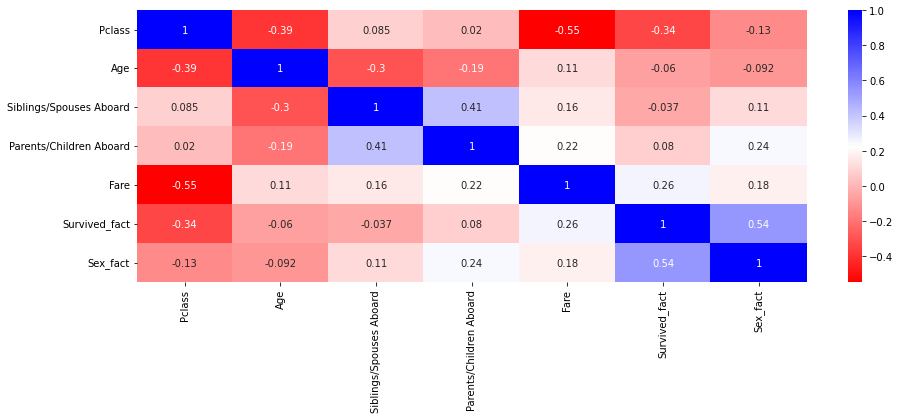

In [ ]:
# First exploration:
plt.figure(figsize=(15,5))
sns.heatmap(df_titanic.corr(), annot = True, cmap='bwr_r')

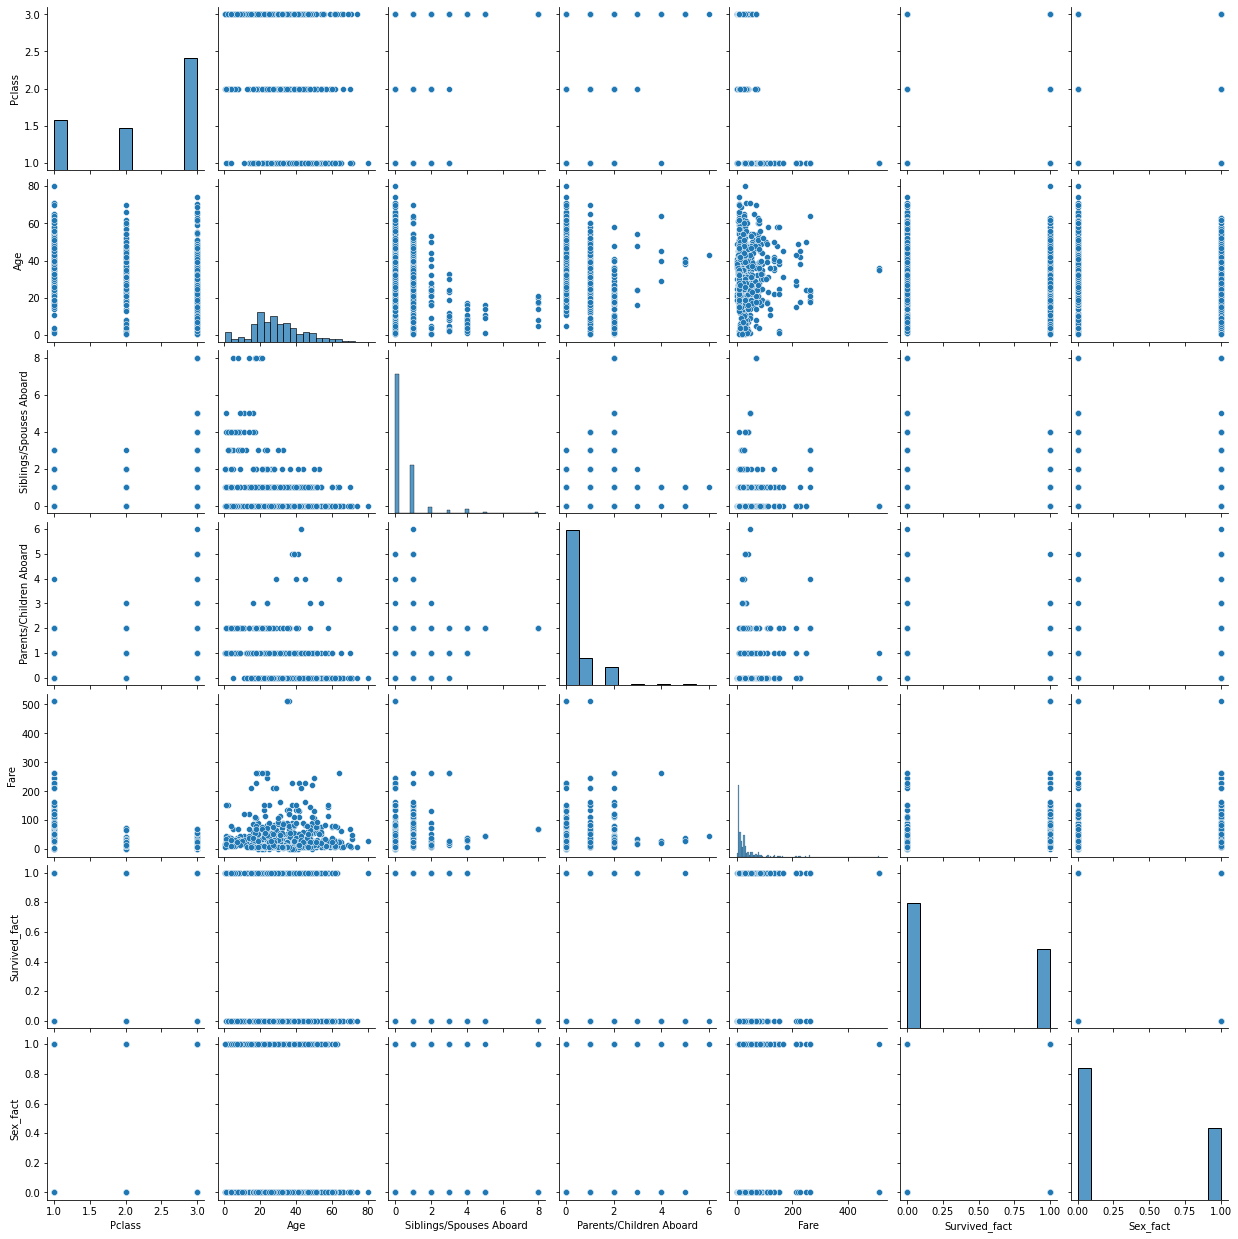

In [ ]:
sns.pairplot(df_titanic.drop('Name', axis = 1))
plt.show()

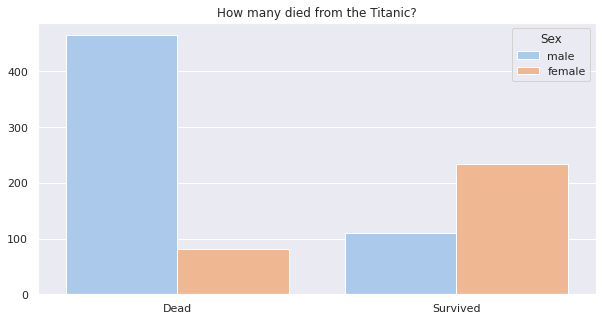

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_theme()
sns.countplot(x= df_titanic['Survived'], hue = df_titanic['Sex'], palette = 'pastel')
plt.title('How many died from the Titanic?')
plt.xlabel('')
plt.ylabel('')
plt.show()

You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
df_titanic[df_titanic['Name'].str.contains('Jack')]

Survived  Pclass                      Name  ...  Fare  Survived_fact  Sex_fact
762     Dead       1  Dr. Arthur Jackson Brewe  ...  39.6              0         0

[1 rows x 10 columns]

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
# It's up to you:
X = df_titanic[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_fact']]
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)

model = LogisticRegression().fit(X_train,y_train)

print('Accuracy score on the train set :', model.score(X_train, y_train))
print('Accuracy score on the test set :', model.score(X_test, y_test))                                              

Accuracy score on the train set : 0.8165413533834587
Accuracy score on the test set : 0.7882882882882883


There isn't overfitting :)

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
                      index = model.classes_ +  " (Actual)",
                      columns = model.classes_ + ' (Predicted)')

print(matrix)
print('\n')
print("Nb of iterations : ", model.n_iter_ )



                   Dead (Predicted)  Survived (Predicted)
Dead (Actual)                   110                    19
Survived (Actual)                28                    65


Nb of iterations :  [54]


# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
# It's up to you to save everybody:
model2 = LogisticRegression(class_weight= {"Dead" : 10})

model2.fit(X_train, y_train)

print('Accuracy score on the train set :', model2.score(X_train, y_train))
print('Accuracy score on the test set :', model2.score(X_test, y_test))  
print('\n')

matrix = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model2.predict(X_test)),
                      index = model2.classes_ +  " (Actual)",
                      columns = model2.classes_ + ' (Predicted)')

print(matrix)

Accuracy score on the train set : 0.7203007518796992
Accuracy score on the test set : 0.6486486486486487


                   Dead (Predicted)  Survived (Predicted)
Dead (Actual)                   129                     0
Survived (Actual)                78                    15


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
# The colonne survived is the second one in this array : 
model.predict_proba(X_test)

In [ ]:
# select only the columns corresponding to the "Survived" probability
new_df = X_test.copy()

new_df['Survived_proba'] = model.predict_proba(X_test)[:, 1]
new_df['name'] = df_titanic['Name'].iloc[new_df.index]
new_df.sort_values(by='Survived_proba', ascending = False )



Pclass   Age  ...  Survived_proba                                      name
883       1  19.0  ...        0.967096               Miss. Margaret Edith Graham
777       1  17.0  ...        0.957487  Mrs. Albert Adrian (Vera Gillespie) Dick
309       1  18.0  ...        0.955769                 Miss. Emily Borie Ryerson
534       1  30.0  ...        0.951621                        Miss. Bertha LeRoy
217       1  32.0  ...        0.942988                      Miss. Albina Bazzani
..      ...   ...  ...             ...                                       ...
264       3  16.0  ...        0.036146                  Mr. Ernesti Arvid Panula
628       3  51.0  ...        0.030838                Mr. Johan Svensson Lundahl
508       3  66.0  ...        0.014338                          Mr. James Webber
535       3  69.0  ...        0.012460                   Mr. Samuel Beard Risien
322       3  20.0  ...        0.005673                   Mr. George John Jr Sage

[222 rows x 8 columns]

# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
# It's up to you:

# création d'un dataframe avec les données de X_test, les noms, la proba de décès et la vrai situation
new_df2 = X_test.copy()

new_df2['Dead_proba'] = model.predict_proba(X_test)[:, 0]
new_df2['name'] = df_titanic['Name'].iloc[new_df2.index]
new_df2['Real_situation'] = df_titanic['Survived'].iloc[new_df2.index]
new_df2 = new_df2.sort_values(by='Dead_proba', ascending = False )
new_df2

Pclass   Age  ...                                      name  Real_situation
322       3  20.0  ...                   Mr. George John Jr Sage            Dead
535       3  69.0  ...                   Mr. Samuel Beard Risien            Dead
508       3  66.0  ...                          Mr. James Webber            Dead
628       3  51.0  ...                Mr. Johan Svensson Lundahl            Dead
264       3  16.0  ...                  Mr. Ernesti Arvid Panula            Dead
..      ...   ...  ...                                       ...             ...
217       1  32.0  ...                      Miss. Albina Bazzani        Survived
534       1  30.0  ...                        Miss. Bertha LeRoy        Survived
309       1  18.0  ...                 Miss. Emily Borie Ryerson        Survived
777       1  17.0  ...  Mrs. Albert Adrian (Vera Gillespie) Dick        Survived
883       1  19.0  ...               Miss. Margaret Edith Graham        Survived

[222 rows x 9 columns]

In [ ]:
# Sur les 120 ayant la plus forte proba de mourir : qui est vraiment mort?
who_really_died = new_df2.iloc[:120, :]

who_really_died[who_really_died['Real_situation'] == 'Dead']

# sur 120 personnes, on en a 99 qui sont vraiment mortes.

Pclass   Age  ...                         name  Real_situation
322       3  20.0  ...      Mr. George John Jr Sage            Dead
535       3  69.0  ...      Mr. Samuel Beard Risien            Dead
508       3  66.0  ...             Mr. James Webber            Dead
628       3  51.0  ...   Mr. Johan Svensson Lundahl            Dead
264       3  16.0  ...     Mr. Ernesti Arvid Panula            Dead
..      ...   ...  ...                          ...             ...
860       2  24.0  ...        Mr. John William Gill            Dead
729       2  23.0  ...    Mr. William John Berriman            Dead
730       2  23.0  ...  Mr. Moses Aaron Troupiansky            Dead
134       2  23.0  ...            Mr. Emile Richard            Dead
671       2  19.0  ...    Mr. Ennis Hastings Watson            Dead

[99 rows x 9 columns]

In [ ]:
# recherchons donc 120 personnes qui sont vraiment mortes, pour les sauver :
people_to_save = list(new_df2[new_df2['Real_situation'] == 'Dead'].iloc[:120, 7])
people_to_save

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [ ]:
two_persons_df = df_titanic.loc[(df_titanic['Name'] == "Rev. Juozas Montvila") | (df_titanic['Name'] ==  "Mrs. William (Margaret Norton) Rice"), 
                                ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_fact']]
two_persons_df

Pclass   Age  ...    Fare  Sex_fact
881       3  39.0  ...  29.125         1
882       2  27.0  ...  13.000         0

[2 rows x 6 columns]

In [ ]:
two_persons_df['Survived_Proba'] = model.predict_proba(two_persons_df)[:, 1]
two_persons_df['Name'] = df_titanic['Name'].iloc[two_persons_df.index]
two_persons_df = two_persons_df.sort_values(by='Survived_Proba', ascending = False )
two_persons_df

Pclass   Age  ...  Survived_Proba                                 Name
881       3  39.0  ...        0.432351  Mrs. William (Margaret Norton) Rice
882       2  27.0  ...        0.287695                 Rev. Juozas Montvila

[2 rows x 8 columns]

Mrs. William (Margaret Norton) Rice a plus de chance de survivre.

In [ ]:
two_persons_df['Real_situation'] = df_titanic['Survived'].iloc[two_persons_df.index]
two_persons_df

Pclass   Age  ...                                 Name  Real_situation
881       3  39.0  ...  Mrs. William (Margaret Norton) Rice            Dead
882       2  27.0  ...                 Rev. Juozas Montvila            Dead

[2 rows x 9 columns]

Ils sont morts tous les deux finalement...